In [10]:
try:
    passes += 1
except NameError:
    %cd ..
    passes = 1

In [11]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import logging
logging.basicConfig(level=logging.INFO)


Iris dataset
==

In [12]:
df_iris_orig = pd.read_csv("data/iris.csv")
df_iris = df_iris_orig.drop(columns=["species"])

In [13]:

c_iris = bb.CART(df_iris, None, X_names=["petal_length", "petal_width"], metrics_type="clustering", max_depth=2)
c_iris.create_tree()
p = c_iris.predict(df_iris)
df_iris["species"] = p

A tree with 4 leafs was created


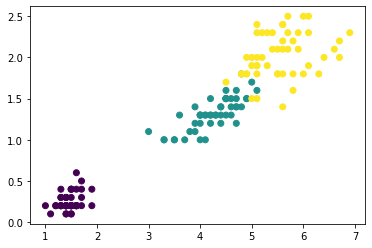

In [14]:
import matplotlib.pyplot as plt
#clusters = [n.value for n in c_iris.tree.nodes()]
clusters = [n for n in df_iris_orig["species"]]
unique = np.unique(clusters)
colors = {}
for i, u in enumerate(unique):
    colors[u] = i
plt.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))


In [15]:

x, y = np.meshgrid(np.linspace(1,7,101),np.linspace(0,2.5,101))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree.traverse(d).value)
unique = [u for u in np.unique(col)]
for i, c in enumerate(col):
    col[i] = unique.index(c)
z = np.array(col).reshape(x.shape)

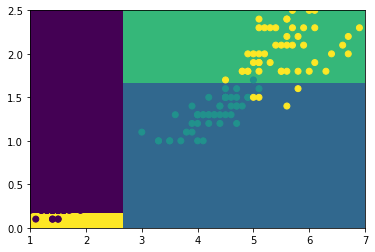

In [16]:
fig, ax = plt.subplots()
ax.pcolormesh(x,y,z)
ax.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))

In [17]:
import binarybeech.utils
binarybeech.utils.print_tree(c_iris.tree)

petal_length<2.64
├── False:petal_width<1.66
│   ├── False:cluster 93c20e7f-399b-4e63-a1fe-36bb3e1ce90b
│   └── True: cluster 90c4f27c-8f1a-4b2f-a76f-b5ff7c8260b3
└── True: petal_width<0.18
    ├── False:cluster 345b5200-ed25-4905-8b38-c34a8c7ab02d
    └── True: cluster e769cbc2-2d17-4012-9ee4-c38d66856522



In [18]:
c_iris.validate()

{}